In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Commodities', min_assets=.2), 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-05-20 to 2019-07-05 - 21


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats

12


,len,mean,std,shrp,drawdown
Symbols,,,,,
PALL,28,3.037215,2.492117,1.202806,2.953034
GLTR,28,1.604869,1.548297,1.010909,1.740267
GLD,28,1.705302,1.999797,0.832894,2.667662
BAR,28,1.713209,2.019313,0.828760,2.700990
SGOL,28,1.712487,2.026135,0.825613,2.692057
IAU,28,1.723038,2.044159,0.823496,2.716592
PSLV,28,1.527647,1.849762,0.804409,2.443279
SLV,28,0.846606,1.723385,0.468220,2.766249
SIVR,28,0.852058,1.737470,0.467562,2.733332


evicted COMT 0.5039957629622575
retry backlogs ['SGOL', 'SLV', 'IAU', 'GLD', 'GLTR', 'SIVR'] at 0.905 - 1.809
retry backlogs ['SGOL', 'SLV', 'GLD', 'IAU', 'SIVR', 'GLTR'] at 0.91 - 1.809
evicted SIVR 0.9094996933696321
retry backlogs ['SGOL', 'SLV', 'GLD', 'IAU', 'GLTR'] at 0.915 - 1.809
retry backlogs ['SGOL', 'GLD', 'SLV', 'GLTR', 'IAU'] at 0.92 - 1.809
retry backlogs ['SGOL', 'GLD', 'SLV', 'GLTR', 'IAU'] at 0.925 - 1.809
evicted SLV 0.9219443633987304
retry backlogs ['SGOL', 'GLD', 'GLTR', 'IAU'] at 0.93 - 1.809
retry backlogs ['SGOL', 'GLTR', 'GLD', 'IAU'] at 0.935 - 1.809
retry backlogs ['SGOL', 'GLTR', 'GLD', 'IAU'] at 0.9400000000000001 - 1.809
retry backlogs ['SGOL', 'GLTR', 'GLD', 'IAU'] at 0.9450000000000001 - 1.809
retry backlogs ['SGOL', 'GLTR', 'GLD', 'IAU'] at 0.9500000000000001 - 1.809
retry backlogs ['SGOL', 'GLTR', 'GLD', 'IAU'] at 0.9550000000000001 - 1.809
retry backlogs ['SGOL', 'GLTR', 'GLD', 'IAU'] at 0.9600000000000001 - 1.809
retry backlogs ['SGOL', 'GLTR', 'GLD

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,28.0,1.420861,0.764506,-0.221475,0.865812,1.500584,1.930943,2.890753,1.806628,1.242610
PALL,28.0,3.037215,2.492117,-1.261729,1.376259,2.863631,4.587668,7.906003,1.202806,2.953034
BAR,28.0,1.713209,2.019313,-2.494698,0.302629,1.270827,3.514973,5.833955,0.828760,2.700990
PSLV,28.0,1.527647,1.849762,-1.410933,0.187571,1.313320,3.445221,4.580158,0.804409,2.443279
DBA,28.0,0.444628,1.424621,-1.775143,-0.658905,0.000000,1.887473,3.650991,0.284248,2.544381
PPLT,28.0,0.454480,1.660174,-2.799010,-0.704249,0.652235,1.683541,3.138898,0.249852,3.572345


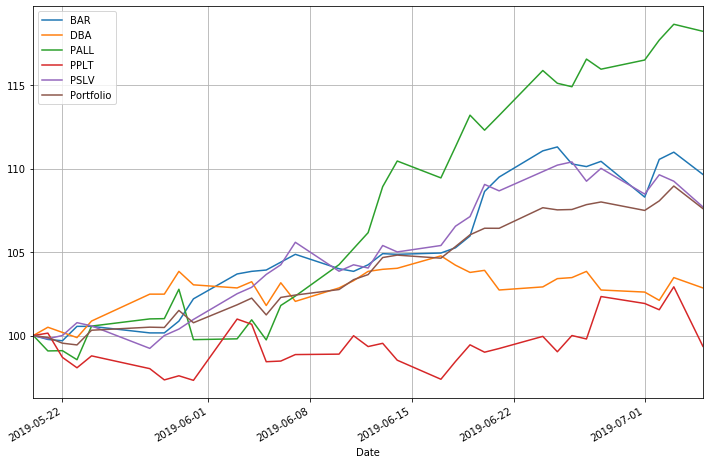

In [4]:
quote.setup_mask(stats.index)
ratio, shrp = quote.optimize_portfolio(.1)
print(ratio, shrp)
quote.setup_mask(ratio)
quote.graph(ratio)